# LoL dataset visualization

## Importing libraries

In [172]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from neuralol.constants import Role, StatsCols

pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Players game stats

In [173]:
df_players_game_stats = pd.read_csv('../data/raw/game_players_stats.csv')
print(f"{df_players_game_stats.shape[0]} rows and {df_players_game_stats.shape[1]} columns")
display(df_players_game_stats.head(10))

df_players_game_stats.info()
df_players_game_stats.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

374554 rows and 28 columns


,game_id,player_id,player_name,team_id,team_name,team_acronym,role,win,game_length,champion_name,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
0,15,0,shanji,0,Legend Esport Gaming,LEG,Top,False,1415,Irelia,7,3,0,0,0,0,2,5,1,179,8530,12,99007,7923,15326,8,0,1
1,15,1,Demon,1,Bilibili Gaming Junior,BLGJ,Top,True,1415,Vladimir,17,8,1,3,1,1,2,3,6,174,8565,14,100342,10857,16475,11,2,1
2,15,2,yanxuan,0,Legend Esport Gaming,LEG,Bot,False,1415,Kai'Sa,7,3,0,0,0,0,2,2,1,227,9613,12,116407,7011,5788,9,0,1
3,15,3,Viod,0,Legend Esport Gaming,LEG,Support,False,1415,Lux,7,3,0,0,0,0,0,4,2,19,5442,10,23555,4932,6151,25,0,0
4,15,4,HanXuan,1,Bilibili Gaming Junior,BLGJ,Mid,True,1415,Aatrox,17,8,1,3,1,1,4,2,4,188,10125,14,125022,10749,15481,10,3,2
5,15,5,Yui,1,Bilibili Gaming Junior,BLGJ,Support,True,1415,Alistar,17,8,1,3,1,1,1,1,11,45,7615,12,27332,2889,8318,25,0,1
6,15,6,Chieftain,1,Bilibili Gaming Junior,BLGJ,Jungle,True,1415,Gragas,17,8,1,3,1,1,5,0,5,129,9686,13,121081,7263,18191,19,5,1
7,15,7,Virus,1,Bilibili Gaming Junior,BLGJ,Bot,True,1415,Xayah,17,8,1,3,1,1,5,1,3,249,12122,14,147097,9059,8442,9,3,2
8,15,8,Assassin,0,Legend Esport Gaming,LEG,Mid,False,1415,Akali,7,3,0,0,0,0,3,5,0,193,9434,13,114025,11373,18390,6,2,1
9,15,9,CatJug,0,Legend Esport Gaming,LEG,Jungle,False,1415,Sejuani,7,3,0,0,0,0,0,1,4,167,8511,13,128180,5912,16508,6,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374554 entries, 0 to 374553
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   game_id                          374554 non-null  int64 
 1   player_id                        374554 non-null  int64 
 2   player_name                      374554 non-null  object
 3   team_id                          374554 non-null  int64 
 4   team_name                        374554 non-null  object
 5   team_acronym                     374264 non-null  object
 6   role                             374554 non-null  object
 7   win                              374554 non-null  bool  
 8   game_length                      374554 non-null  int64 
 9   champion_name                    374554 non-null  object
 10  team_kills                       374554 non-null  int64 
 11  tower_kills                      374554 non-null  int64 
 12  inhibitor_kills 

,game_id,player_id,team_id,game_length,team_kills,tower_kills,inhibitor_kills,dragon_kills,herald_kills,baron_kills,player_kills,player_deaths,player_assists,total_minions_killed,gold_earned,level,total_damage_dealt,total_damage_dealt_to_champions,total_damage_taken,wards_placed,largest_killing_spree,largest_multi_kill
count,374554.000000,374554.000000,374554.000000,3.745540e+05,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000,374554.000000
mean,18729.401448,1549.469631,283.521236,2.376872e+03,13.915163,6.018486,0.895227,2.262723,0.885904,0.696305,2.783038,2.788671,6.393858,204.271643,11472.205180,14.789699,155852.709826,13792.472418,19392.803756,20.362722,1.762427,1.060029
std,10813.836519,1234.016945,222.844447,3.202794e+04,7.267931,3.618850,1.065168,1.400929,0.759774,0.741653,2.683247,1.947362,4.446742,105.844330,3389.038142,2.184600,92223.609967,8750.449083,9394.270675,18.232569,2.250181,0.833039
min,0.000000,0.000000,0.000000,8.060000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,374.000000,33.000000,5.000000,1.299000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,5316.000000,10.000000,11445.530000,2087.000000,4978.000000,0.000000,0.000000,0.000000
5%,1872.000000,120.000000,25.000000,1.435000e+03,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,6472.000000,11.000000,15928.000000,3327.650000,7587.000000,6.000000,0.000000,0.000000
25%,9363.000000,480.000000,86.000000,1.682000e+03,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,147.000000,8911.000000,13.000000,102675.750000,7145.000000,12421.000000,10.000000,0.000000,1.000000
50%,18731.000000,1221.000000,221.000000,1.873000e+03,14.000000,7.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,6.000000,220.000000,11243.000000,15.000000,158449.000000,12180.000000,17574.000000,14.000000,0.000000,1.000000
75%,28094.000000,2409.000000,449.000000,2.111000e+03,19.000000,9.000000,1.000000,3.000000,1.000000,1.000000,4.000000,4.000000,9.000000,277.000000,13635.000000,16.000000,209655.500000,18340.000000,24689.000000,21.000000,3.000000,1.000000
95%,35586.000000,3965.000000,699.000000,2.531000e+03,26.000000,11.000000,3.000000,4.000000,2.000000,2.000000,8.000000,6.000000,15.000000,360.000000,17422.000000,18.000000,309147.100000,30181.350000,36953.000000,61.000000,6.000000,3.000000


In [174]:
print(f"Number of different games: {df_players_game_stats[StatsCols.GAME_ID].nunique()}")
print(f"Number of different players: {df_players_game_stats[StatsCols.PLAYER_ID].nunique()}")
print(f"Number of different teams: {df_players_game_stats[StatsCols.TEAM_ID].nunique()}")
# Check missing values in players_game_stats
print("\nMissing values in players_game_stats:")
missing_values = df_players_game_stats.isna().sum()
print(missing_values[missing_values > 0])  # Only show columns with missing values

# Percentage of missing values
print("\nPercentage of missing values:")
percent_missing = (missing_values / df_players_game_stats.shape[0]) * 100
print(percent_missing[percent_missing > 0])  # Only show columns with missing values

Number of different games: 37459
Number of different players: 4953
Number of different teams: 844

Missing values in players_game_stats:
team_acronym    290
dtype: int64

Percentage of missing values:
team_acronym    0.077425
dtype: float64


### Game stats visualization

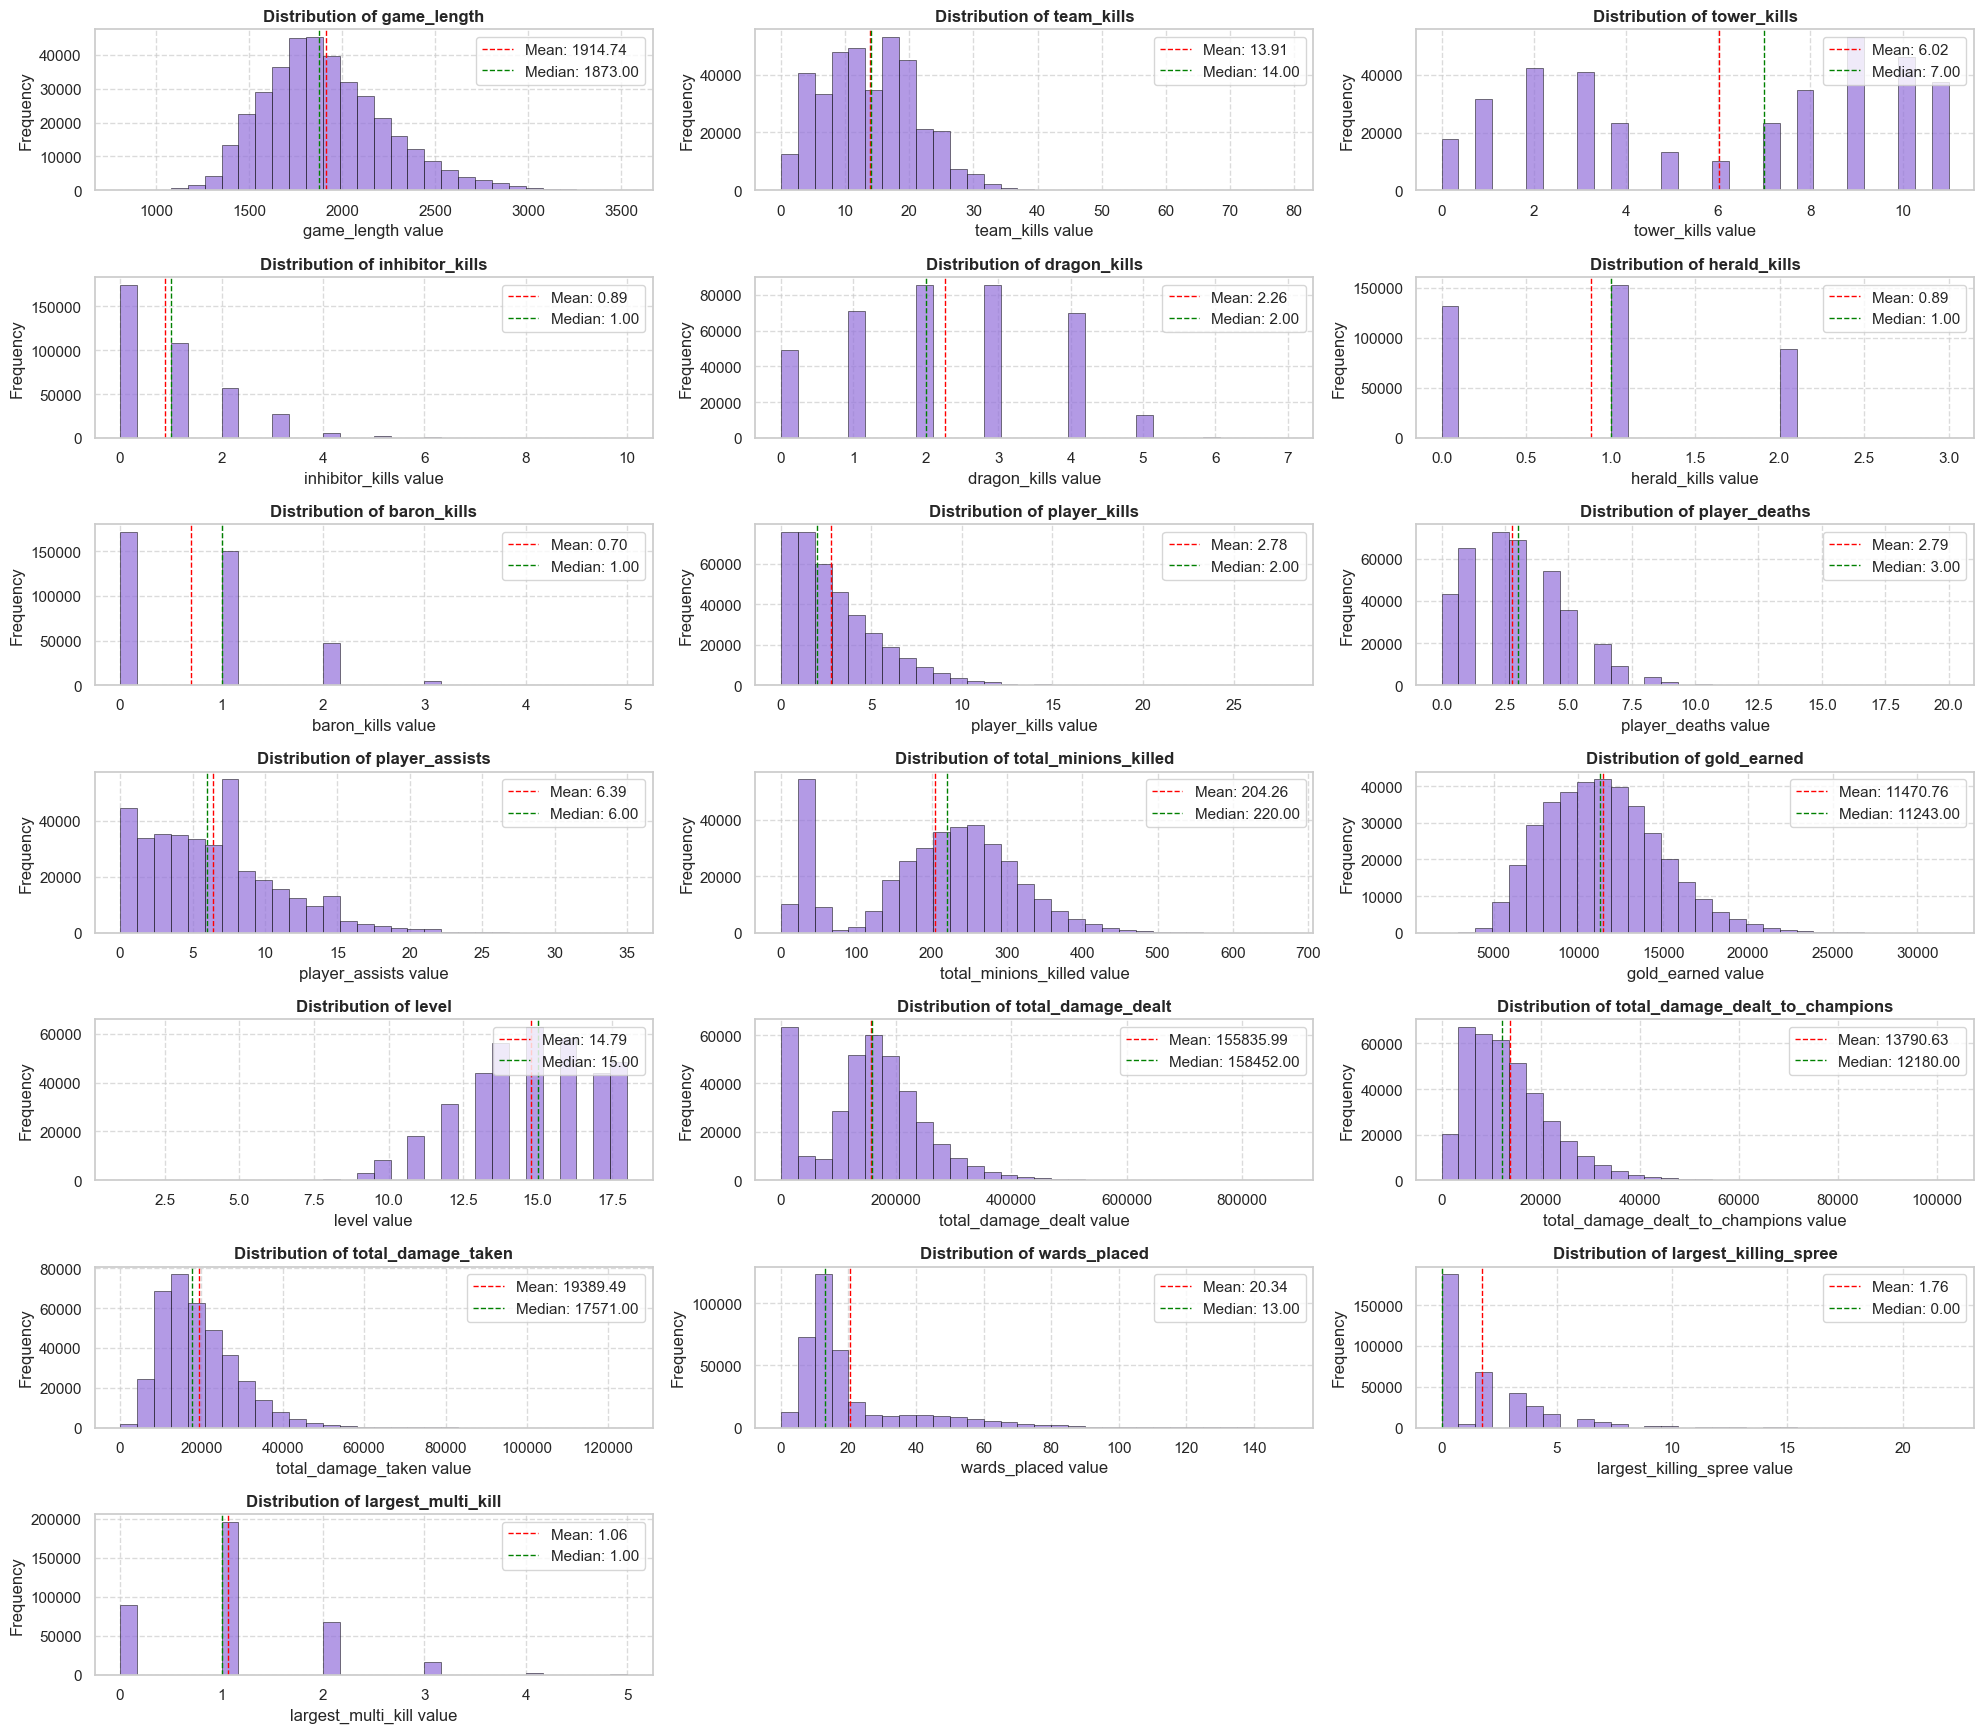

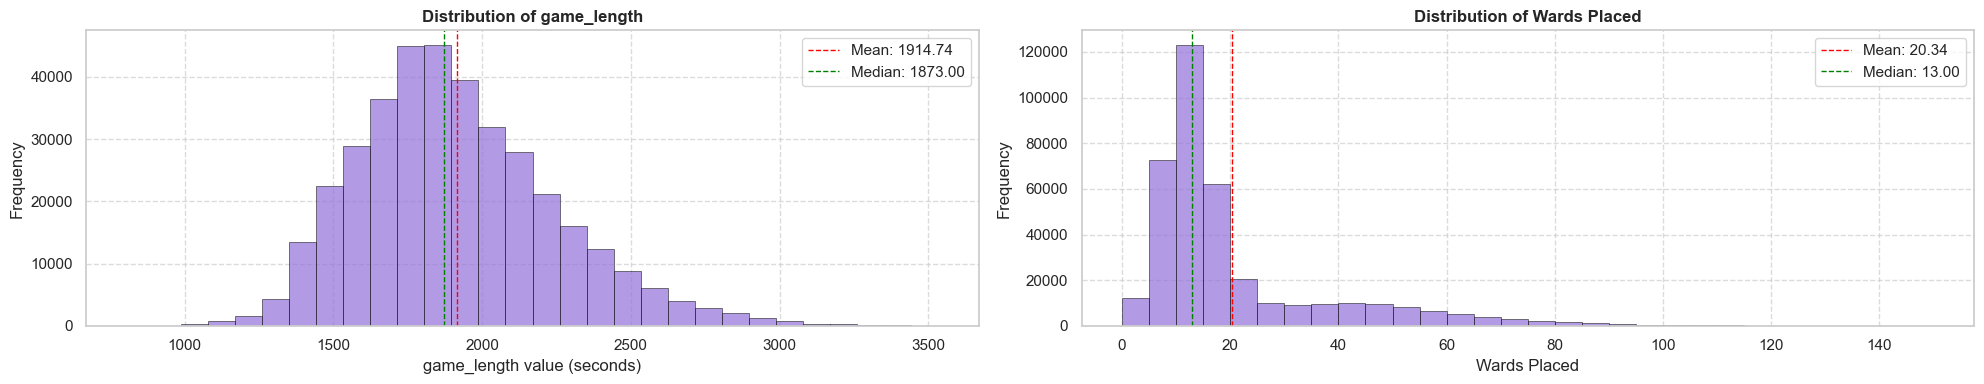

Number of rows after filtering: 374366


,game_length,wards_placed
count,374366.000000,374366.000000
mean,1914.735040,20.344046
std,335.562374,18.169536
min,806.000000,0.000000
1%,1299.000000,0.000000
5%,1435.000000,6.000000
25%,1682.000000,10.000000
50%,1873.000000,13.000000
75%,2111.000000,21.000000
95%,2529.000000,61.000000


In [184]:
numeric_players_game_stats = df_players_game_stats.select_dtypes(include=['float64', 'int64']).drop(
    columns=[StatsCols.GAME_ID, StatsCols.PLAYER_ID, StatsCols.TEAM_ID])
# Calculate means & medians for all numeric columns
column_means = numeric_players_game_stats.mean()
column_medians = numeric_players_game_stats.median()

# Set up a grid of subplots
n_columns = len(numeric_players_game_stats.columns)
n_cols = 3  # Number of columns in the grid
n_rows = (n_columns + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create the figure with proper size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 2.5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Create a histogram for each numeric column
for i, column in enumerate(numeric_players_game_stats.columns):
    ax = axes[i]
    data = numeric_players_game_stats[column]
    
    # Create histogram
    ax.hist(data, bins=30, alpha=0.7, color="mediumpurple", edgecolor="black", linewidth=0.5)
    
    # Add a vertical line for the mean & median
    mean_value = column_means[column]
    median_value = column_medians[column]
    ax.axvline(mean_value, color="red", linestyle="dashed", linewidth=1, label=f"Mean: {mean_value:.2f}")
    ax.axvline(median_value, color="green", linestyle="dashed", linewidth=1, label=f"Median: {median_value:.2f}")
    
    # Set labels and title
    ax.set_xlabel(f"{column} value")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {column}", fontweight="bold")
    ax.legend(loc='upper right', framealpha=0.8)
    
    # Add grid lines
    ax.grid(True, linestyle="--", alpha=0.7)

# Hide any unused subplots
for i in range(n_columns, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Remove outliers: games longer than 1 hour and with excessive ward placement
df_players_game_stats = df_players_game_stats[df_players_game_stats[StatsCols.GAME_LENGTH] <= 1 * 60 * 60]
df_players_game_stats = df_players_game_stats[df_players_game_stats[StatsCols.WARDS_PLACED] <= 150]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Game Length distribution
axes[0].hist(df_players_game_stats[StatsCols.GAME_LENGTH], bins=30, alpha=0.7, color="mediumpurple", edgecolor="black", linewidth=0.5)
axes[0].axvline(df_players_game_stats[StatsCols.GAME_LENGTH].mean(), color="red", linestyle="dashed", linewidth=1,
            label=f"Mean: {df_players_game_stats[StatsCols.GAME_LENGTH].mean():.2f}")
axes[0].axvline(df_players_game_stats[StatsCols.GAME_LENGTH].median(), color="green", linestyle="dashed", linewidth=1,
            label=f"Median: {df_players_game_stats[StatsCols.GAME_LENGTH].median():.2f}")
axes[0].set_xlabel(f"{StatsCols.GAME_LENGTH} value (seconds)")
axes[0].set_ylabel("Frequency")
axes[0].set_title(f"Distribution of {StatsCols.GAME_LENGTH}", fontweight="bold")
axes[0].legend(loc='upper right', framealpha=0.8)
axes[0].grid(True, linestyle="--", alpha=0.7)

# Wards Placed distribution
axes[1].hist(df_players_game_stats[StatsCols.WARDS_PLACED], bins=30, alpha=0.7, color="mediumpurple", edgecolor="black", linewidth=0.5)
axes[1].axvline(df_players_game_stats[StatsCols.WARDS_PLACED].mean(), color="red", linestyle="dashed", linewidth=1,
            label=f"Mean: {df_players_game_stats[StatsCols.WARDS_PLACED].mean():.2f}")
axes[1].axvline(df_players_game_stats[StatsCols.WARDS_PLACED].median(), color="green", linestyle="dashed", linewidth=1,
            label=f"Median: {df_players_game_stats[StatsCols.WARDS_PLACED].median():.2f}")
axes[1].set_xlabel("Wards Placed")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Wards Placed", fontweight="bold")
axes[1].legend(loc='upper right', framealpha=0.8)
axes[1].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Print count of filtered rows for reference
print(f"Number of rows after filtering: {df_players_game_stats.shape[0]}")
df_players_game_stats[[StatsCols.GAME_LENGTH, StatsCols.WARDS_PLACED]].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])

### Games played by player

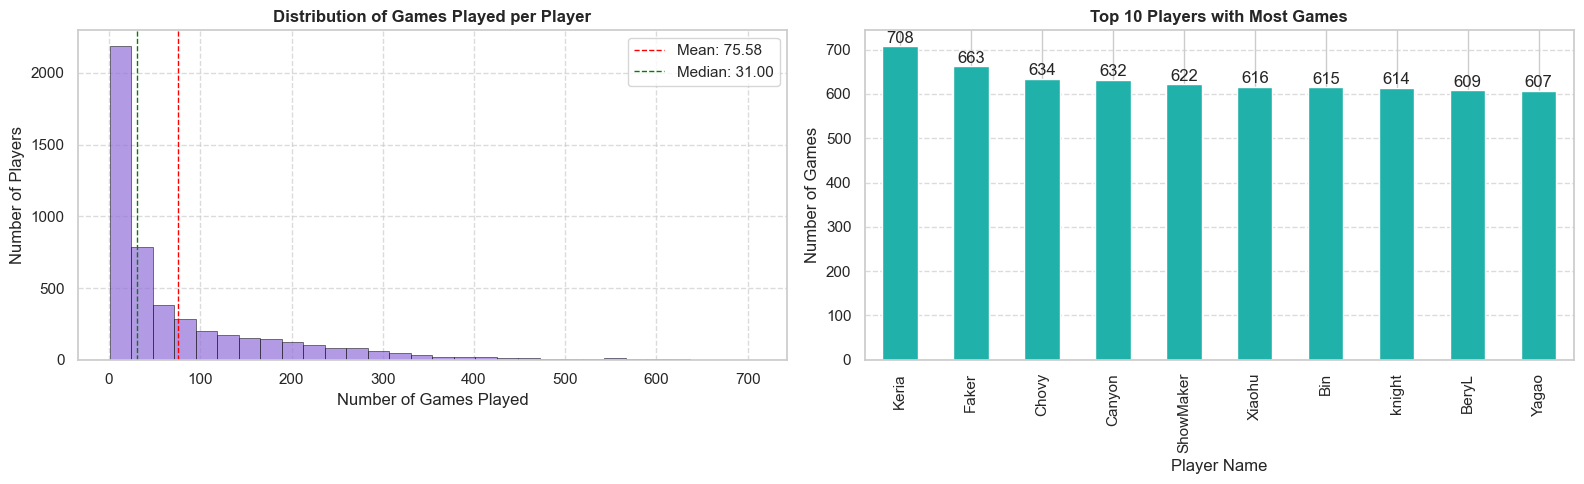

In [176]:
# Count the number of games played by each player
games_per_player = df_players_game_stats.groupby(StatsCols.PLAYER_ID)[StatsCols.GAME_ID].nunique()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# Plot histogram of games per player
axes[0].hist(games_per_player, bins=30, color='mediumpurple', edgecolor='black', alpha=0.7, linewidth=0.5)
axes[0].set_xlabel('Number of Games Played')
axes[0].set_ylabel('Number of Players')
axes[0].set_title('Distribution of Games Played per Player', fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.7)
# Add some statistics to the histogram
mean_games = games_per_player.mean()
median_games = games_per_player.median()
axes[0].axvline(mean_games, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_games:.2f}")
axes[0].axvline(median_games, color='green', linestyle='dashed', linewidth=1, label=f"Median: {median_games:.2f}")
axes[0].legend(loc='upper right', framealpha=0.8)

# Get the top 10 players with most games
top_players = games_per_player.nlargest(10)
# Map player names to player IDs
player_name_mapping = df_players_game_stats[[StatsCols.PLAYER_ID, StatsCols.PLAYER_NAME]].drop_duplicates().set_index(StatsCols.PLAYER_ID)[StatsCols.PLAYER_NAME]
# Create numbers of games played Series with player names as index
top_players_with_names = pd.Series(top_players.values, index=[player_name_mapping[player_id] for player_id in top_players.index])

# Plot bar chart for top 5 players
bars = top_players_with_names.plot(kind='bar', ax=axes[1], color='lightseagreen')
axes[1].set_xlabel('Player Name')
axes[1].set_ylabel('Number of Games')
axes[1].set_title('Top 10 Players with Most Games', fontweight='bold')
axes[1].grid(True, linestyle='--', alpha=0.7, axis='y')

# Add the values on top of the bars
for i, v in enumerate(top_players_with_names):
    axes[1].text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Most played champions

Number of different champions played: 168


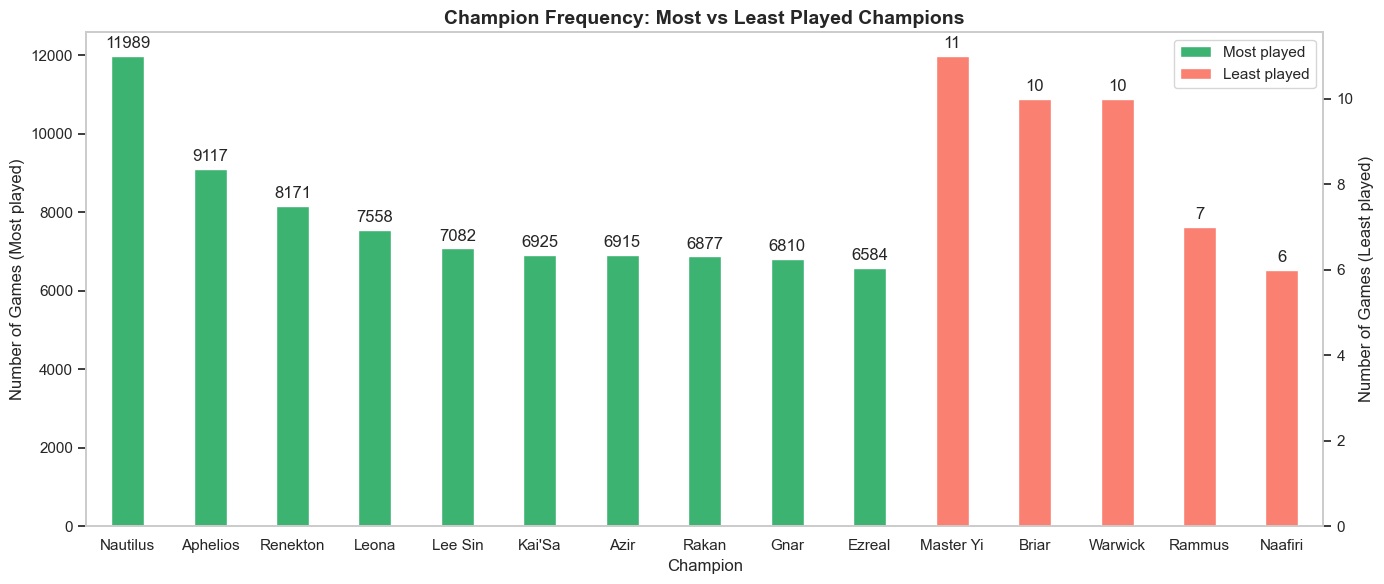

In [177]:
# Count the number of games played per champion
champion_counts = df_players_game_stats['champion_name'].value_counts()
print(f"Number of different champions played: {len(champion_counts.values)}")

# Get top 10 and bottom 5 champions by games played
top_10_champions = champion_counts.nlargest(10).sort_values(ascending=False)
bottom_5_champions = champion_counts.nsmallest(5).sort_values(ascending=False)

# Create figure for top 10 and bottom 5 champions
fig, ax = plt.subplots(figsize=(14, 6))

# Plot top 10 champions manually
x_top = range(len(top_10_champions))
ax.bar(x_top, list(top_10_champions.values), color='mediumseagreen', width=0.4, label='Most played')
# Add count values on top of bars for top 10
for i, v in enumerate(top_10_champions):
    ax.text(i, v + (top_10_champions.max() * 0.01), str(v), ha='center', va='bottom')

# Plot bottom 5 champions after the top 10
ax2 = ax.twinx()  # Create a second y-axis sharing the same x-axis
x_bottom = range(len(top_10_champions), len(top_10_champions) + len(bottom_5_champions))
ax2.bar(x_bottom, list(bottom_5_champions.values), color='salmon', width=0.4, label='Least played')
# Add count values on top of bars for bottom 5
for i, v in enumerate(bottom_5_champions):
    ax2.text(i + len(top_10_champions), v + (bottom_5_champions.max() * 0.01), str(v), ha='center', va='bottom')

# Adjust x-axis limits to show all bars & x-ticks to show all champion names
plt.xlim(-0.5, len(top_10_champions) + len(bottom_5_champions) - 0.5)
all_champions = list(top_10_champions.index) + list(bottom_5_champions.index)
plt.xticks(range(len(all_champions)), all_champions, ha='right')

# Set titles and labels
ax.set_title('Champion Frequency: Most vs Least Played Champions', fontsize=14, fontweight='bold')
ax.set_xlabel('Champion')
ax.set_ylabel('Number of Games (Most played)')
ax2.set_ylabel('Number of Games (Least played)')
# Add legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='best')
ax.grid(False)
ax2.grid(False)

plt.tight_layout()
plt.show()

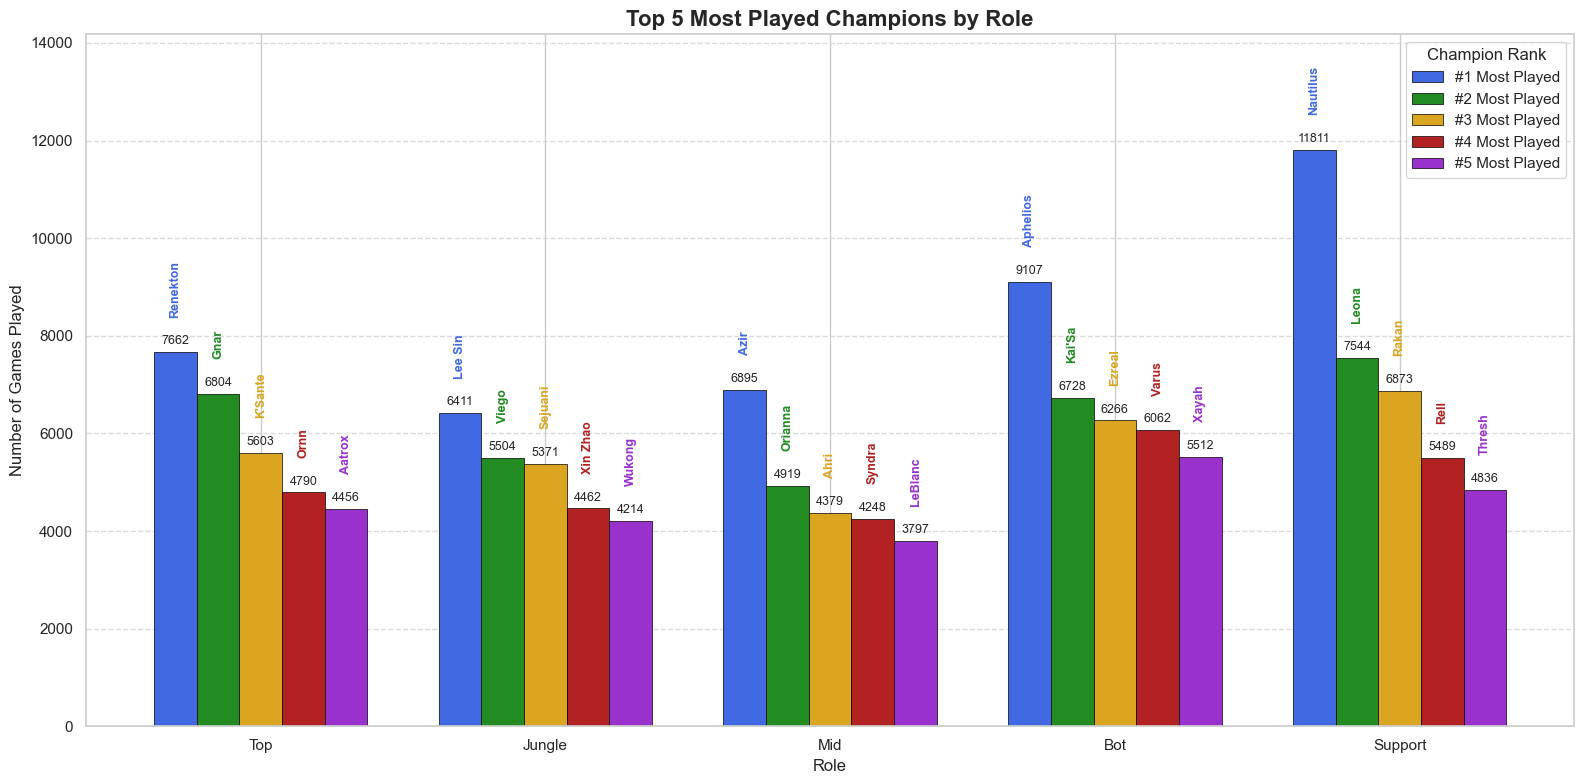

In [178]:
unique_roles = [Role.TOP, Role.JUNGLE, Role.MID, Role.BOT, Role.SUPPORT]

# Create a figure
fig, ax = plt.subplots(figsize=(16, 8))

# Define colors for champion ranks
rank_colors = {
    1: 'royalblue',
    2: 'forestgreen', 
    3: 'goldenrod',
    4: 'firebrick',
    5: 'darkorchid'
}

bar_width = 0.15 # Set the width of the bars
num_ranks = 5  # Shows top 5 champions for each role

# For each role, we'll have one group with bars for each champion rank (1st to 5th most played)
x = np.arange(len(unique_roles))  # Positions for role groups

champ_names = {} # Store champion names for each role
max_y_val = 0 # Variable to keep track of the maximum y-value for proper scaling

# Plot bars for each champion rank
for i in range(1, num_ranks + 1):  # 1 to 5
    rank_data = [] # Store the number of games played for a rank of each role
    for role in unique_roles:
        role_data = df_players_game_stats[df_players_game_stats[StatsCols.ROLE] == role] # Keep only rows for this role
        top_champs = role_data[StatsCols.CHAMPION_NAME].value_counts().nlargest(num_ranks) # Get top 5 champions for this role
        
        # Store top 5 champion names if this is the first iteration
        if i == 1:
            champ_names[role] = list(top_champs.index)
        
        rank_data.append(top_champs.values[i-1])
    
    # Calculate positions for this rank's bars
    positions = x + (i - num_ranks/2 - 0.5) * bar_width
    
    # Plot bars
    bars = ax.bar(positions, rank_data, width=bar_width, color=rank_colors[i],
                 label=f'#{i} Most Played', edgecolor='black', linewidth=0.5)
    
    # Add values and champion names on top of bars
    for j, val in enumerate(rank_data):
        # Add value text
        ax.text(positions[j], val + 100, str(val), ha='center', va='bottom', fontsize=9)
        
        # Add champion name
        role = unique_roles[j]
        champ_name = champ_names[role][i-1]
        ax.annotate(champ_name, 
                  xy=(positions[j], val),
                  xytext=(0, 25),
                  textcoords="offset points", 
                  ha='center', va='bottom',
                  fontsize=9, rotation=90,
                  color=rank_colors[i],
                  fontweight='bold')
    
    # Keep the maximum y-value for scaling
    max_y_val = max(max_y_val, max(rank_data))

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(unique_roles)
# Set y-axis limit with enough room for annotations
ax.set_ylim(0, max_y_val * 1.2)

# Customize plot
ax.set_xlabel('Role', fontsize=12)
ax.set_ylabel('Number of Games Played', fontsize=12)
ax.set_title(f'Top {num_ranks} Most Played Champions by Role', fontsize=16, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.7, axis='y')
ax.legend(title='Champion Rank', loc='upper right')

plt.tight_layout()
plt.show()

### Feature analysis

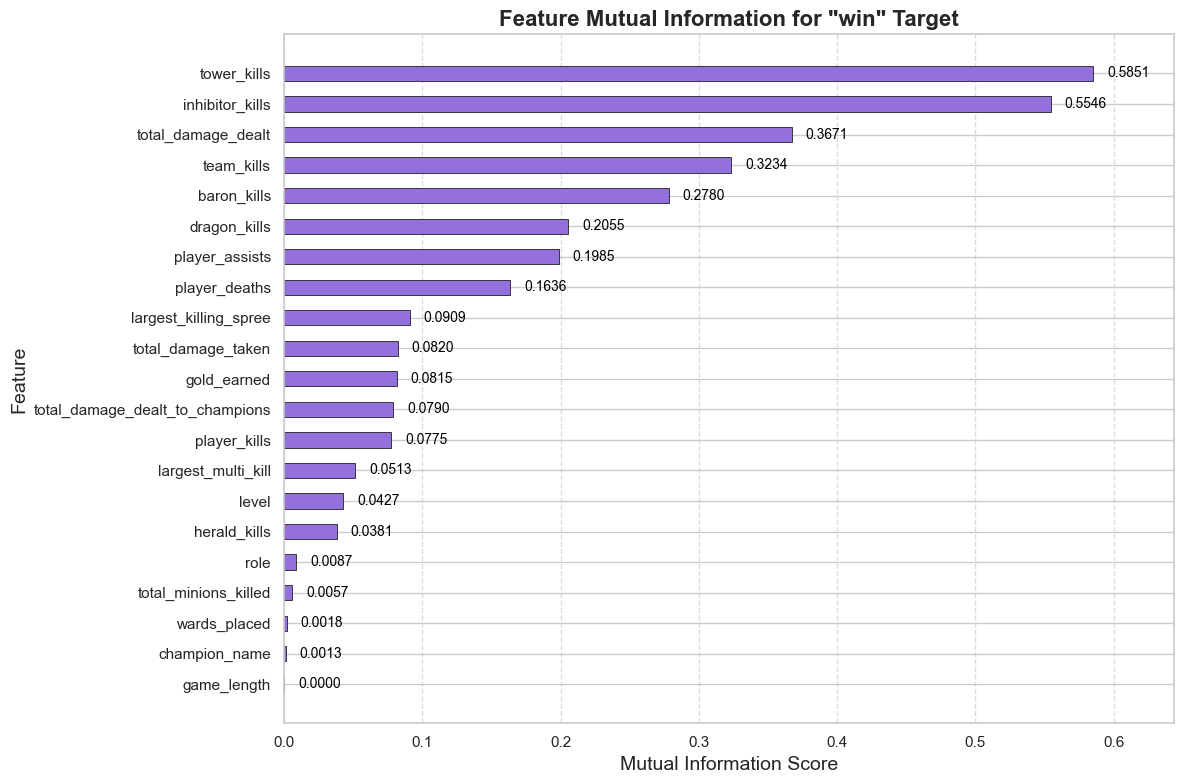

In [179]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder

# Define columns to exclude (identifiers and redundant information)
exclude_cols = [StatsCols.GAME_ID, StatsCols.PLAYER_ID, StatsCols.PLAYER_NAME, StatsCols.TEAM_ID, StatsCols.TEAM_NAME, StatsCols.TEAM_ACRONYM]

# Separate features and target
X = df_players_game_stats.drop(columns=[StatsCols.WIN] + exclude_cols)
y = df_players_game_stats[StatsCols.WIN]

# Identify categorical columns (object type)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a copy of X for preprocessing
X_processed = X.copy()

# Encode categorical features
if categorical_cols:
    encoder = OrdinalEncoder()
    X_processed[categorical_cols] = encoder.fit_transform(X[categorical_cols])
    
discrete_features = X.dtypes == int

# Calculate mutual information for all features
mi_scores = mutual_info_classif(X_processed, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_processed.columns)
mi_scores = mi_scores.sort_values(ascending=True)

# Plot the results
plt.figure(figsize=(12, 8))
bars = plt.barh(mi_scores.index, mi_scores, height=0.5, color='mediumpurple', edgecolor='black', linewidth=0.5)
plt.xlim(0, mi_scores.max() * 1.1)  # Set x-axis limit with some padding
plt.title('Feature Mutual Information for "win" Target', fontsize=16, fontweight='bold')
plt.xlabel('Mutual Information Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value annotations to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
             va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

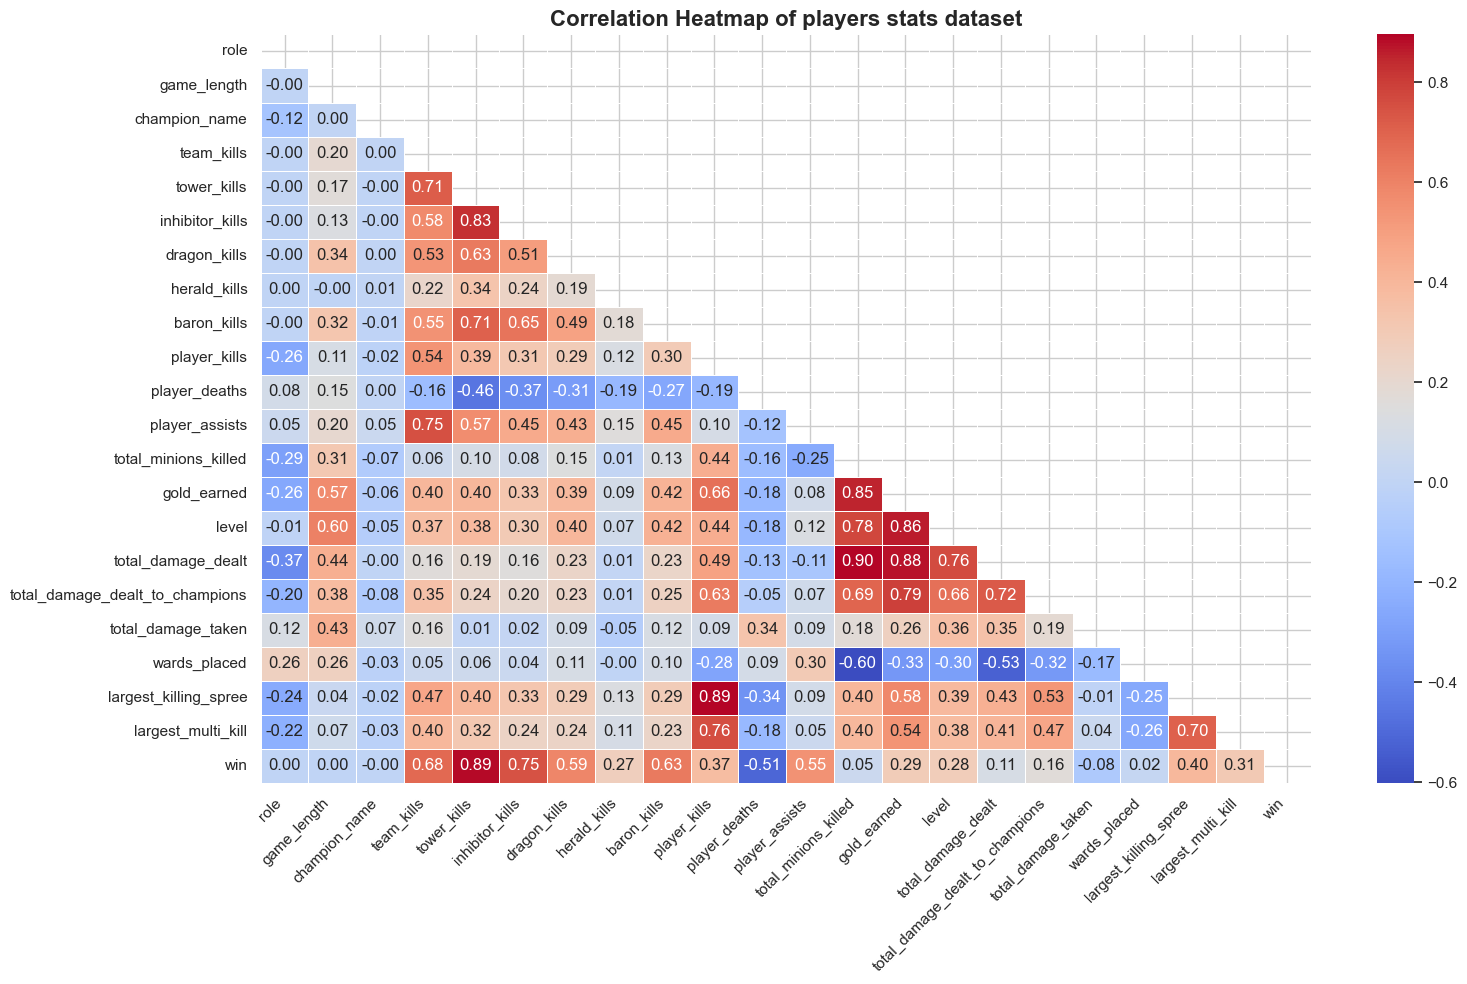

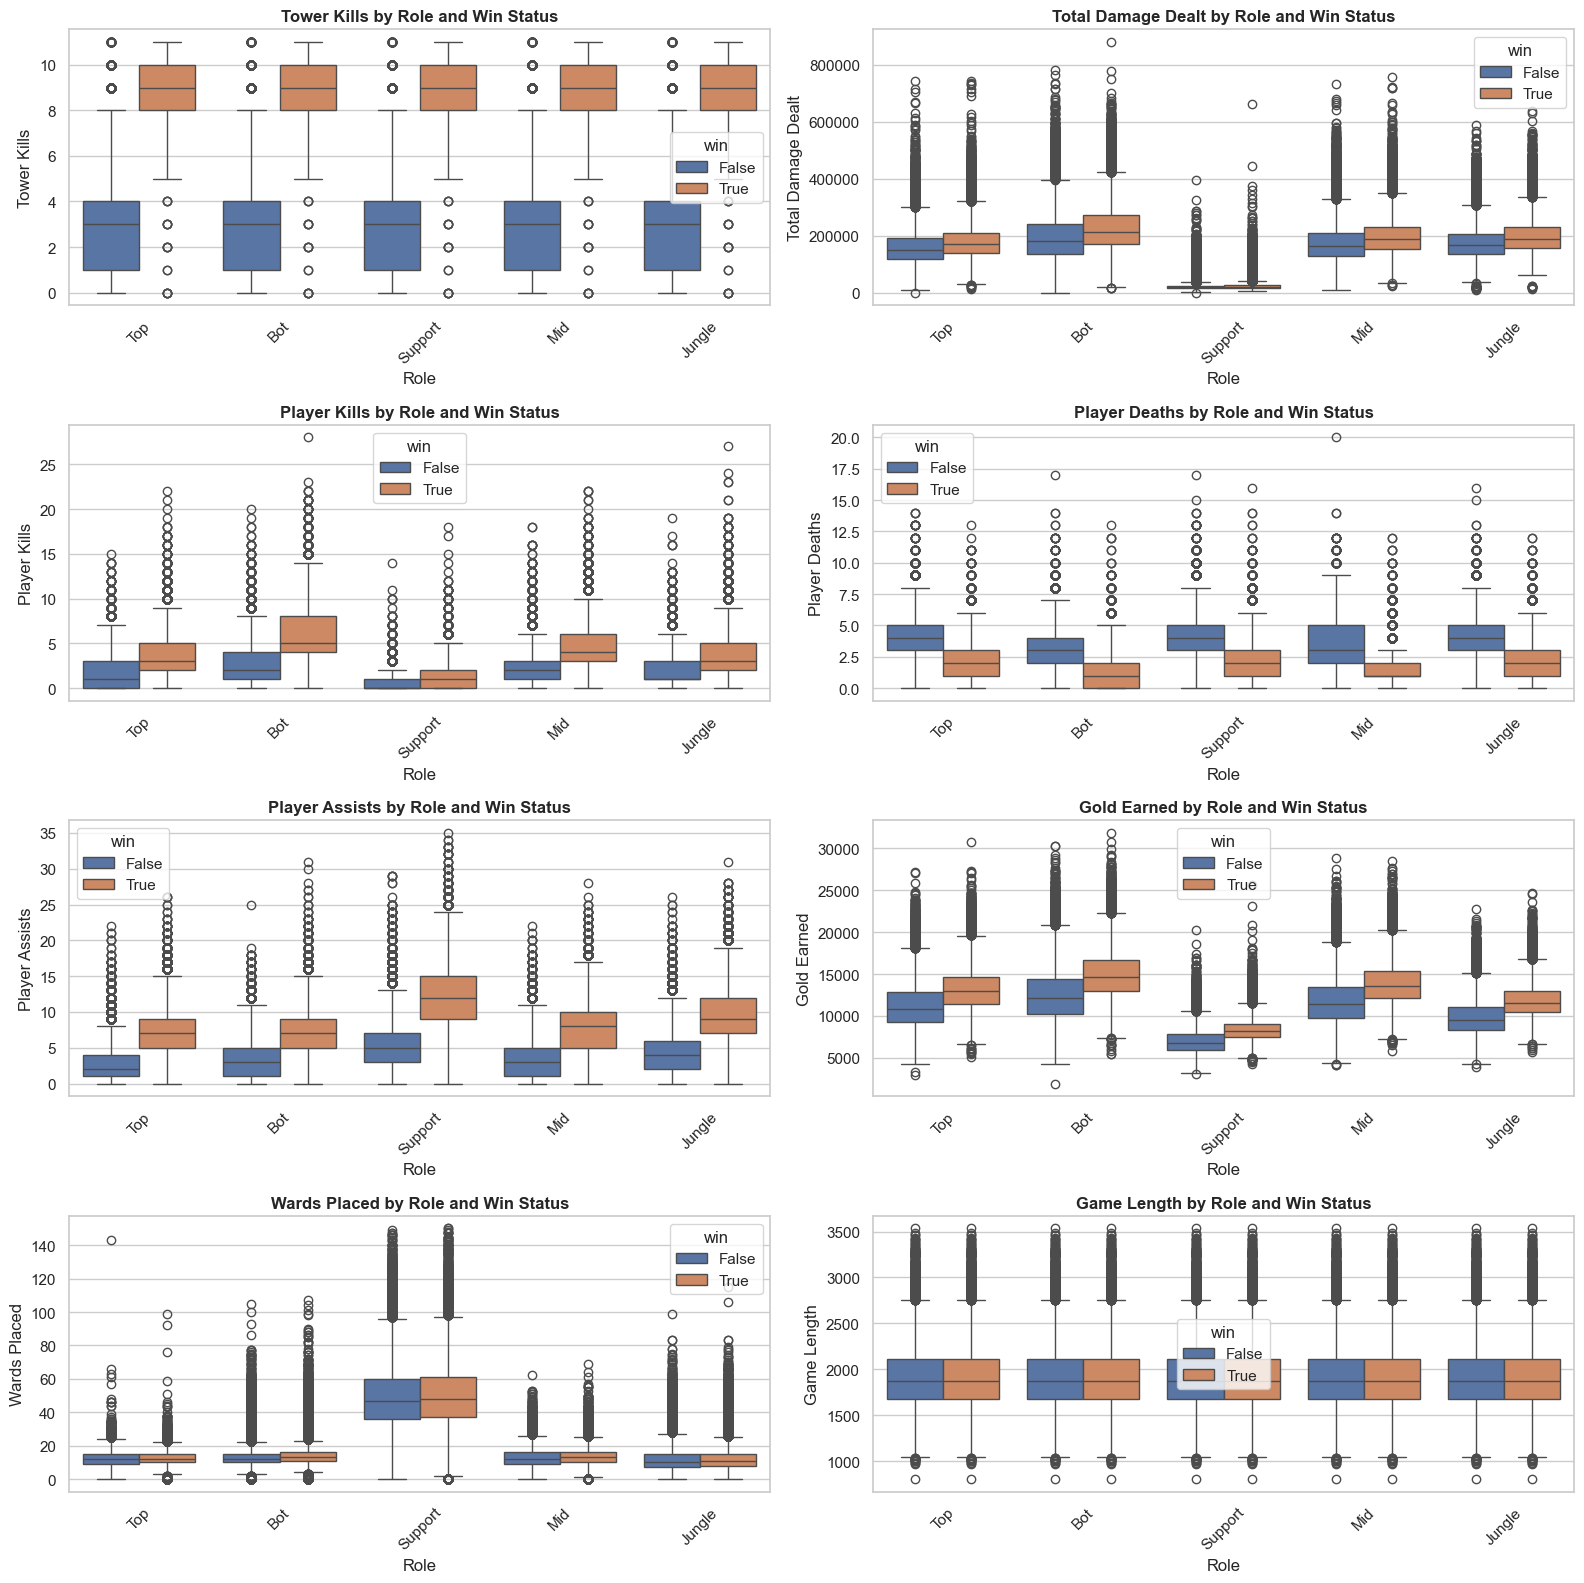

In [180]:
import seaborn as sns

# Set style for better visualization
sns.set_theme(style="whitegrid")
# Create a correlation heatmap for the most important features
plt.figure(figsize=(16, 10))

X_processed[StatsCols.WIN] = df_players_game_stats[StatsCols.WIN] # Re add win column to X_processed
correlation = X_processed.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool)) # Boolean mask to only show lower triangle
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)
plt.title("Correlation Heatmap of players stats dataset", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

key_metrics = [StatsCols.TOWER_KILLS, StatsCols.TOTAL_DAMAGE_DEALT, StatsCols.PLAYER_KILLS, StatsCols.PLAYER_DEATHS, StatsCols.PLAYER_ASSISTS, StatsCols.GOLD_EARNED, StatsCols.WARDS_PLACED, StatsCols.GAME_LENGTH]

# Box plots for key metrics by role and win status
n_cols = 2
n_rows = (len(key_metrics) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()

for i, metric in enumerate(key_metrics):
    sns.boxplot(x=StatsCols.ROLE, y=metric, hue=StatsCols.WIN, data=df_players_game_stats, ax=axes[i])
    axes[i].set_title(f"{metric.replace('_', ' ').title()} by Role and Win Status", fontweight='bold')
    axes[i].set_xlabel('Role')
    axes[i].set_ylabel(metric.replace('_', ' ').title())
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(len(key_metrics), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

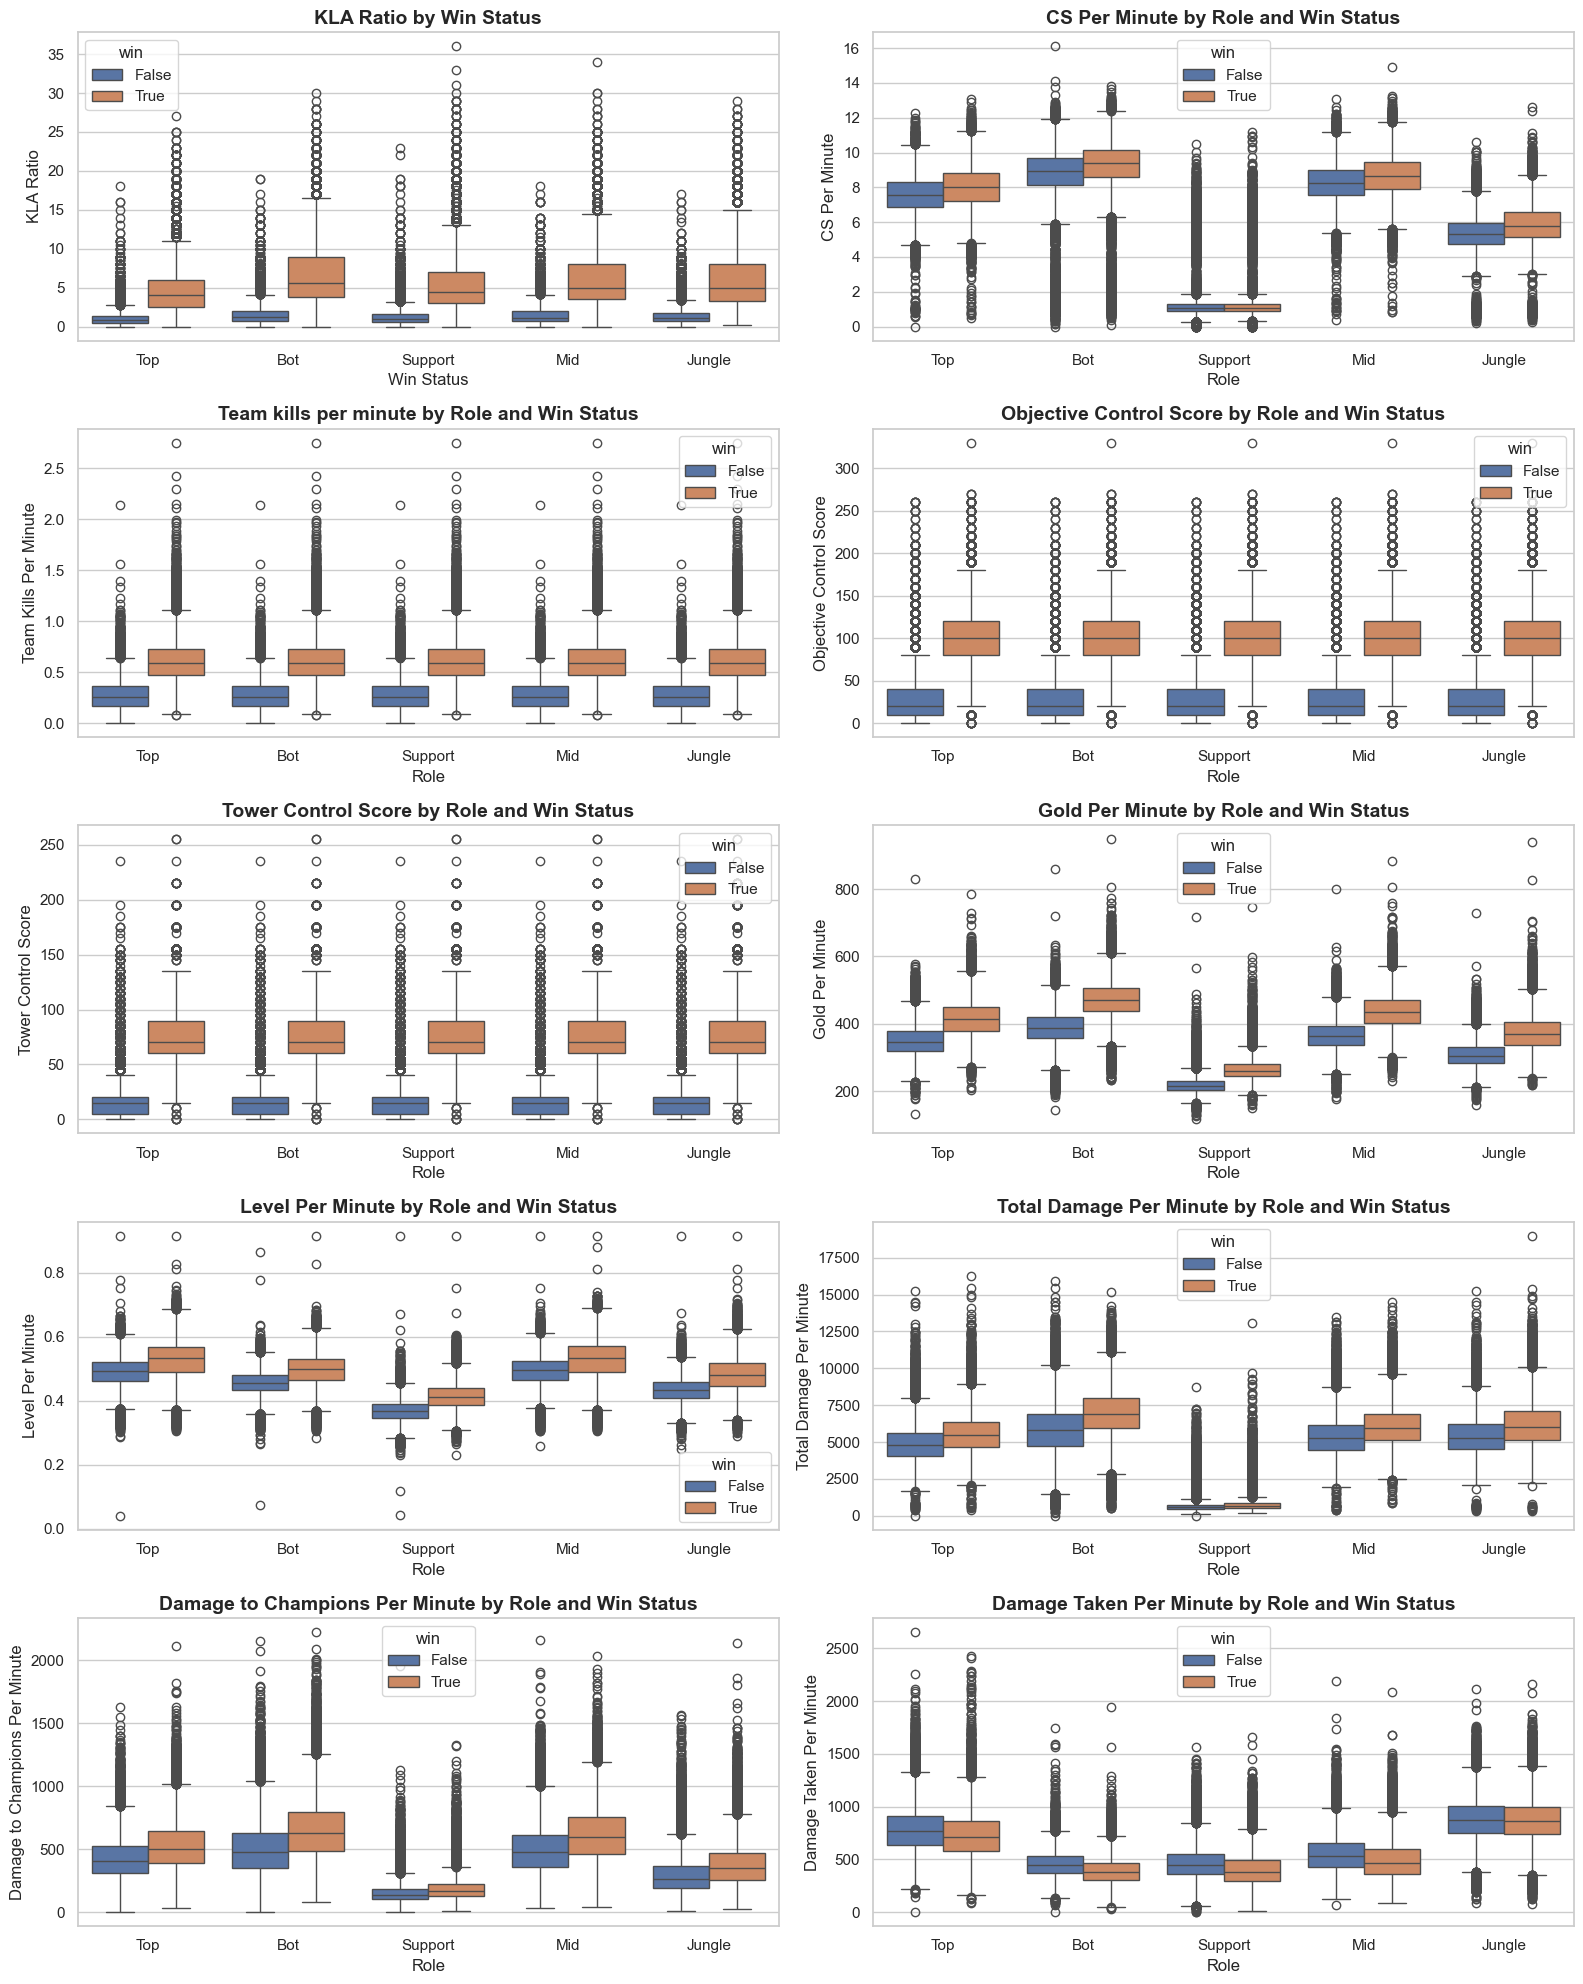

In [185]:
# Calculate and visualize new features
df_temp = df_players_game_stats.copy()
# KLA ratio
df_temp['kla_ratio'] = (df_temp[StatsCols.PLAYER_KILLS] + df_temp[StatsCols.PLAYER_ASSISTS]) / (df_temp[StatsCols.PLAYER_DEATHS] + 1)
# CS per minute
df_temp['cs_per_minute'] = df_temp[StatsCols.TOTAL_MINIONS_KILLED] / (df_temp[StatsCols.GAME_LENGTH] / 60)
# Kill participation
df_temp['team_kills_per_min'] = df_temp[StatsCols.TEAM_KILLS] / (df_temp[StatsCols.GAME_LENGTH] / 60)
# Objective Control Score: weighted sum of dragon_kills, herald_kills, baron_kills
df_temp['objective_control_score'] = (df_temp[StatsCols.DRAGON_KILLS] * 10 +
                                      df_temp[StatsCols.HERALD_KILLS] * 10 +
                                      df_temp[StatsCols.BARON_KILLS] * 50)
# Tower control score: weighted sum of tower_kills and inhibitor_kills
df_temp['tower_control_score'] = (df_temp[StatsCols.TOWER_KILLS] * 5 + df_temp[StatsCols.INHIBITOR_KILLS] * 20)
# Gold per minute
df_temp['gold_per_min'] = df_temp[StatsCols.GOLD_EARNED] / (df_temp[StatsCols.GAME_LENGTH] / 60)
# Level per minute
df_temp['level_per_min'] = df_temp[StatsCols.LEVEL] / (df_temp[StatsCols.GAME_LENGTH] / 60)
# Total damage per minute
df_temp['total_damage_per_min'] = df_temp[StatsCols.TOTAL_DAMAGE_DEALT] / (df_temp[StatsCols.GAME_LENGTH] / 60)
# Damage to champions per minute
df_temp['damage_to_champions_per_min'] = df_temp[StatsCols.TOTAL_DAMAGE_DEALT_TO_CHAMPIONS] / (df_temp[StatsCols.GAME_LENGTH] / 60)
# Damage taken per minute
df_temp['damage_taken_per_min'] = df_temp[StatsCols.TOTAL_DAMAGE_TAKEN] / (df_temp[StatsCols.GAME_LENGTH] / 60)

# Visualize role-specific important metrics
n_cols = 2
n_rows = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()
sns.boxplot(x=StatsCols.ROLE, y='kla_ratio', hue=StatsCols.WIN, data=df_temp, ax=axes[0])
axes[0].set_title("KLA Ratio by Win Status", fontsize=14, fontweight='bold')
axes[0].set_xlabel('Win Status')
axes[0].set_ylabel('KLA Ratio')

sns.boxplot(x=StatsCols.ROLE, y='cs_per_minute', hue=StatsCols.WIN, data=df_temp, ax=axes[1])
axes[1].set_title("CS Per Minute by Role and Win Status", fontsize=14, fontweight='bold')
axes[1].set_xlabel('Role')
axes[1].set_ylabel('CS Per Minute')

sns.boxplot(x=StatsCols.ROLE, y='team_kills_per_min', hue=StatsCols.WIN, data=df_temp, ax=axes[2])
axes[2].set_title("Team kills per minute by Role and Win Status", fontsize=14, fontweight='bold')
axes[2].set_xlabel('Role')
axes[2].set_ylabel('Team Kills Per Minute')

sns.boxplot(x=StatsCols.ROLE, y='objective_control_score', hue=StatsCols.WIN, data=df_temp, ax=axes[3])
axes[3].set_title("Objective Control Score by Role and Win Status", fontsize=14, fontweight='bold')
axes[3].set_xlabel('Role')
axes[3].set_ylabel('Objective Control Score')

sns.boxplot(x=StatsCols.ROLE, y='tower_control_score', hue=StatsCols.WIN, data=df_temp, ax=axes[4])
axes[4].set_title("Tower Control Score by Role and Win Status", fontsize=14, fontweight='bold')
axes[4].set_xlabel('Role')
axes[4].set_ylabel('Tower Control Score')

sns.boxplot(x=StatsCols.ROLE, y='gold_per_min', hue=StatsCols.WIN, data=df_temp, ax=axes[5])
axes[5].set_title("Gold Per Minute by Role and Win Status", fontsize=14, fontweight='bold')
axes[5].set_xlabel('Role')
axes[5].set_ylabel('Gold Per Minute')

sns.boxplot(x=StatsCols.ROLE, y='level_per_min', hue=StatsCols.WIN, data=df_temp, ax=axes[6])
axes[6].set_title("Level Per Minute by Role and Win Status", fontsize=14, fontweight='bold')
axes[6].set_xlabel('Role')
axes[6].set_ylabel('Level Per Minute')

sns.boxplot(x=StatsCols.ROLE, y='total_damage_per_min', hue=StatsCols.WIN, data=df_temp, ax=axes[7])
axes[7].set_title("Total Damage Per Minute by Role and Win Status", fontsize=14, fontweight='bold')
axes[7].set_xlabel('Role')
axes[7].set_ylabel('Total Damage Per Minute')

sns.boxplot(x=StatsCols.ROLE, y='damage_to_champions_per_min', hue=StatsCols.WIN, data=df_temp, ax=axes[8])
axes[8].set_title("Damage to Champions Per Minute by Role and Win Status", fontsize=14, fontweight='bold')
axes[8].set_xlabel('Role')
axes[8].set_ylabel('Damage to Champions Per Minute')

sns.boxplot(x=StatsCols.ROLE, y='damage_taken_per_min', hue=StatsCols.WIN, data=df_temp, ax=axes[9])
axes[9].set_title("Damage Taken Per Minute by Role and Win Status", fontsize=14, fontweight='bold')
axes[9].set_xlabel('Role')
axes[9].set_ylabel('Damage Taken Per Minute')

plt.tight_layout()
plt.show()

## Game metadata

In [182]:
game_metadata = pd.read_csv('../data/raw/game_metadata.csv')
print(f"{game_metadata.shape[0]} rows and {game_metadata.shape[1]} columns")
display(game_metadata.head(10))

37459 rows and 9 columns


,game_id,date,match_id,tournament_id,tournament_name,series_id,series_name,league_id,league_name
0,0,2019-09-15 10:17:30.487000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
1,1,2019-09-15 11:18:01.085000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
2,2,2019-09-15 12:11:33.489000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
3,3,2019-09-15 13:03:19.662000,0,0,Playoffs,0,VCS Summer 2019,0,VCS
4,4,2019-09-16 04:32:28.724000,1,1,Playoffs,1,LJL Summer 2019,1,LJL
5,5,2019-09-16 05:29:41.680000,1,1,Playoffs,1,LJL Summer 2019,1,LJL
6,6,2019-09-16 06:45:07.195000,1,1,Playoffs,1,LJL Summer 2019,1,LJL
7,7,2019-09-16 07:45:59.496000,1,1,Playoffs,1,LJL Summer 2019,1,LJL
8,8,2019-09-15 15:08:08.817000,2,2,Regional Finals,2,LEC Summer 2019,2,LEC
9,9,2019-09-15 16:03:21.799000,2,2,Regional Finals,2,LEC Summer 2019,2,LEC


## Game events

In [183]:
df_game_events = pd.read_csv('../data/raw/game_events.csv')
print(f"{df_game_events.shape[0]} rows and {df_game_events.shape[1]} columns")
display(df_game_events.head(10))

1884740 rows and 8 columns


,id,game_id,timestamp,event_type,killer_id,killed_id,assisting_player_ids,drake_type
0,0,0,229,player_kill,21.0,29.0,[23],NaN
1,1,0,289,player_kill,21.0,29.0,[23],NaN
2,2,0,499,player_kill,25.0,21.0,"[29, 22]",NaN
3,3,0,504,player_kill,22.0,23.0,"[29, 25]",NaN
4,4,0,535,player_kill,28.0,24.0,[27],NaN
5,5,0,698,player_kill,28.0,24.0,"[21, 23, 30, 27]",NaN
6,6,0,700,player_kill,23.0,26.0,"[30, 28, 27]",NaN
7,7,0,705,player_kill,27.0,25.0,"[21, 30]",NaN
8,8,0,819,player_kill,28.0,24.0,[27],NaN
9,9,0,823,player_kill,22.0,28.0,[24],NaN
